<a href="https://colab.research.google.com/github/sujal-dhawan/Loan-Eligibility-Prediction/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Loan Eligibility Prediction using Machine Learning (by SUJAL DHAWAN)

In the modern world, loans are crucial for managing education, living expenses, or purchasing properties. Banks assess various factors like marital status, education, income, and credit history to determine loan eligibility.

In this project, we aim to predict loan eligibility using machine learning. The dataset contains 13 features, including Gender, Education, Applicant Income, and Credit History. The following algorithms are used:

- **Random Forest**: An ensemble learning method used for classification.
- **Logistic Regression**: A linear classification algorithm.

Evaluation metrics like cross-validation and ROC-AUC are used to assess performance.

### Steps:
1. **Import Libraries and Dataset**
2. **Exploratory Data Analysis (EDA)**
3. **Data Preprocessing**
4. **Model Development and Evaluation**
*




In [4]:
df = pd.read_csv('loan_data.csv')
print(df.head())  # This will show the first few rows of your data

    Loan_ID Gender Married  ApplicantIncome  LoanAmount Loan_Status
0  LP001002   Male      No             5849         NaN           Y
1  LP001003   Male     Yes             4583       128.0           N
2  LP001005   Male     Yes             3000        66.0           Y
3  LP001006   Male     Yes             2583       120.0           Y
4  LP001008   Male      No             6000       141.0           Y


# Dataset Description

The dataset consists of 13 features used to predict loan eligibility. The columns are:

1. Loan_ID: Unique identifier for each loan.
2. Gender: Applicant's gender (Male/Female).
3. Married: Marital status (Yes/No).
4. Dependents: Number of dependents.
5. Education: Applicant's education level (Graduate/Not Graduate).
6. Self_Employed: Self-employment status (Yes/No).
7. ApplicantIncome: Applicant's income.
8. CoapplicantIncome: Coapplicant's income.
9. LoanAmount: Loan amount in thousands.
10. Loan_Amount_Term: Loan term (months).
11. Credit_History: Credit history (1 for good, 0 for bad).
12. Property_Area: Area type (Urban/Semiurban/Rural).
13. Loan_Status: Loan approval status (Y/N).

This data will be used to predict whether an applicant’s loan will be approved or not.



### 1. Data Cleaning and Preprocessing:
- Handle missing values:
  - **LoanAmount**: Fill with median value
  - **Gender**: Fill with mode value
- Apply **Label Encoding** to convert categorical variables into numerical values.

### 2. Model Training and Evaluation:
- Split the data into **training** and **validation** sets.
- Handle class imbalance using **Random OverSampling**.
- Normalize features using **StandardScaler**.
- Train **Random Forest** and **Logistic Regression** models.
- Evaluate the models using **ROC AUC** and **GridSearchCV** for hyperparameter tuning.

### 3. Data Visualization:
- Visualize **Loan Status** distribution with a **pie chart**.
- Visualize **Gender/Marital Status** vs **Loan Status** using a **countplot**.
- Plot **histograms** for **Applicant Income** and **Loan Amount**.
- Create **boxplots** for **ApplicantIncome** and **LoanAmount**.


Random Forest - Train Accuracy: 1.0000, Validation Accuracy: 0.5097
Random Forest - Cross-validation ROC AUC Score: 0.8982
Best Random Forest Model: RandomForestClassifier(n_estimators=200, random_state=10)


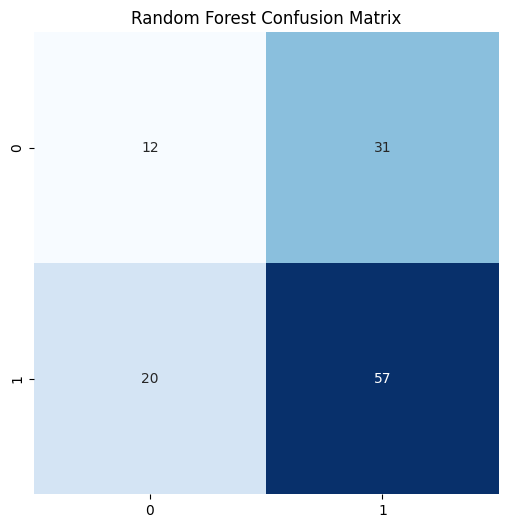

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.28      0.32        43
           1       0.65      0.74      0.69        77

    accuracy                           0.57       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.55      0.57      0.56       120

Logistic Regression - Train Accuracy: 0.5719, Validation Accuracy: 0.5234
Logistic Regression - Cross-validation ROC AUC Score: 0.5769


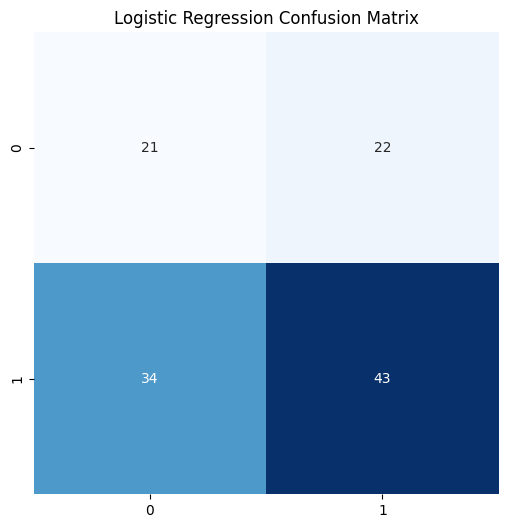

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.49      0.43        43
           1       0.66      0.56      0.61        77

    accuracy                           0.53       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.56      0.53      0.54       120



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from joblib import dump  # Import joblib for saving the model

import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the Dataset
df = pd.read_csv('loan_data.csv')

# Step 2: Handle Missing Values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Step 3: Label Encoding for Categorical Data
def encode_labels(data):
    for col in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    return data

df = encode_labels(df)

# Step 4: Split Data into Features and Target Variable
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Step 5: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

# Step 6: Handle Class Imbalance
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Step 7: Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Step 8: Train Models and Evaluate
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=10),
    'Logistic Regression': LogisticRegression(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = metrics.roc_auc_score(y_train, model.predict(X_train))
    val_acc = metrics.roc_auc_score(y_val, model.predict(X_val))
    print(f"{name} - Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Cross-validation
    cv_score = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc')
    print(f"{name} - Cross-validation ROC AUC Score: {np.mean(cv_score):.4f}")

    # Hyperparameter Tuning for Random Forest
    if name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(f"Best Random Forest Model: {grid_search.best_estimator_}")

    # Save the model to a file
    dump(model, f'/content/{name.lower().replace(" ", "_")}_model.joblib')  # Save the model with a simple name

    # Confusion Matrix
    cm = metrics.confusion_matrix(y_val, model.predict(X_val))
    plt.figure(figsize=(6, 6))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # Classification Report
    print(f"{name} Classification Report:\n{metrics.classification_report(y_val, model.predict(X_val))}")


## Loan Eligibility Prediction: Input and Prediction Logic

In this section of the code, we are taking input from the user to predict the loan eligibility (approved or rejected) based on certain personal details and financial information. Below is a step-by-step breakdown of what happens:

### 1. **User Input Collection**:
The program prompts the user to enter the following details:
- **Gender**: The user is asked to enter "Male" or "Female."
- **Marital Status**: The user is asked if they are "Married" or "Not Married."
- **Credit History**: The user is asked if they have a "Credit History" (Yes/No).
- **Applicant Income**: The user is asked to enter their income amount as a numeric value.
- **Loan Amount**: The user is asked to enter the loan amount they are applying for as a numeric value.

### 2. **Data Preprocessing**:
To prepare the input data for the machine learning model, the categorical inputs (Gender, Marital Status, and Credit History) are converted into numeric values as follows:
- **Gender**: "Male" is encoded as `1`, and "Female" is encoded as `0`.
- **Marital Status**: "Yes" is encoded as `1` (indicating married), and "No" is encoded as `0` (indicating not married).
- **Credit History**: "Yes" is encoded as `1` (indicating a positive credit history), and "No" is encoded as `0` (indicating no credit history).

The numeric values for these features are then combined into a list `features` containing:
- **gender**, **married**, **credit_history**, **applicant_income**, and **loan_amount**.

### 3. **Prediction**:
The `model.predict()` function is called with the processed input data (`features`). This passes the input through the trained machine learning model to predict whether the loan will be **Approved** or **Rejected**.

### 4. **Output**:
The model returns a prediction value:
- If the predicted value is `1`, the loan is **Approved**.
- If the predicted value is `0`, the loan is **Rejected**.

Finally, the result is printed to the user as either "Loan Status: Approved" or "Loan Status: Rejected."


In [18]:
# Simple Form for Loan Eligibility Input

gender = input("Enter Gender (Male/Female): ")
married = input("Are you Married? (Yes/No): ")
credit_history = input("Do you have Credit History? (Yes/No): ")

applicant_income = float(input("Enter Applicant Income: "))
loan_amount = float(input("Enter Loan Amount: "))

# Convert text inputs to numerical values
gender = 1 if gender.lower() == "male" else 0
married = 1 if married.lower() == "yes" else 0
credit_history = 1 if credit_history.lower() == "yes" else 0

features = [[gender, married, credit_history, applicant_income, loan_amount]]
prediction = model.predict(features)

result = "Approved" if prediction[0] == 1 else "Rejected"
print(f"Loan Status: {result}")

Enter Gender (Male/Female): Female
Are you Married? (Yes/No): Yes
Do you have Credit History? (Yes/No): Yes
Enter Applicant Income: 60000
Enter Loan Amount: 5000
Loan Status: Rejected


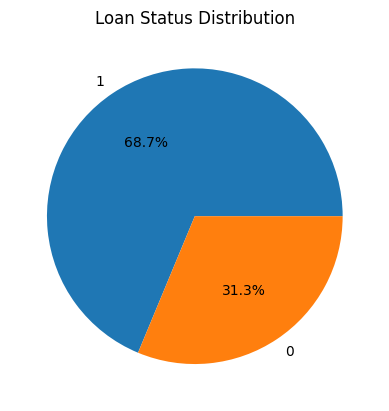

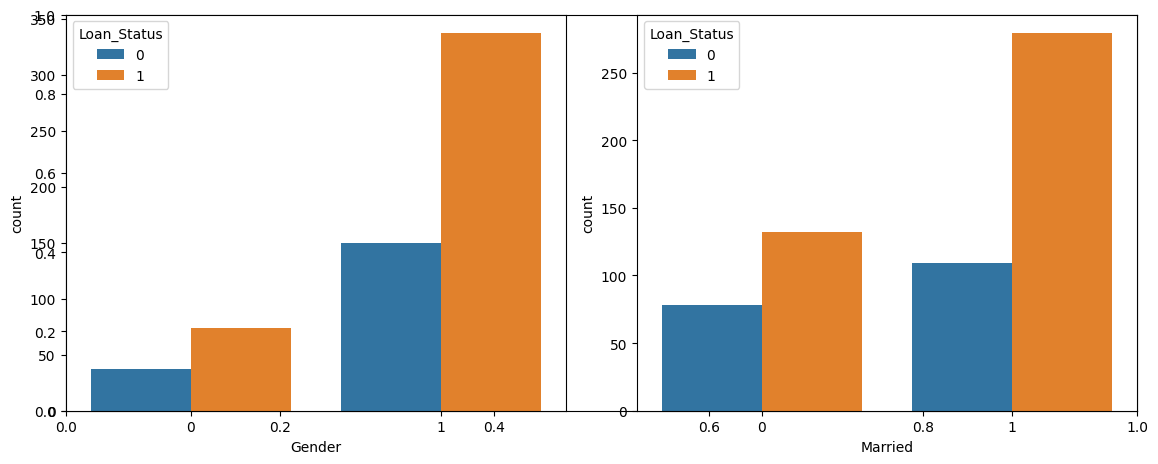

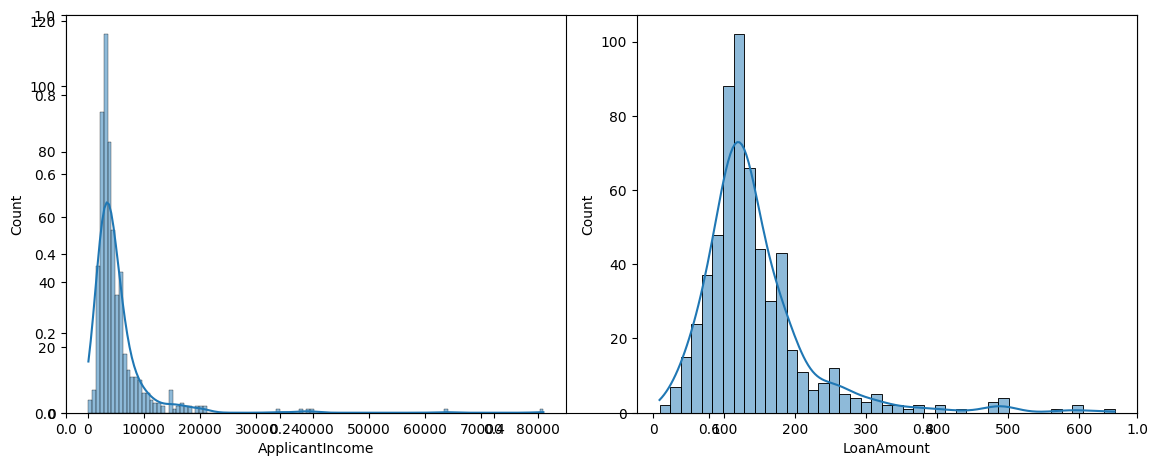

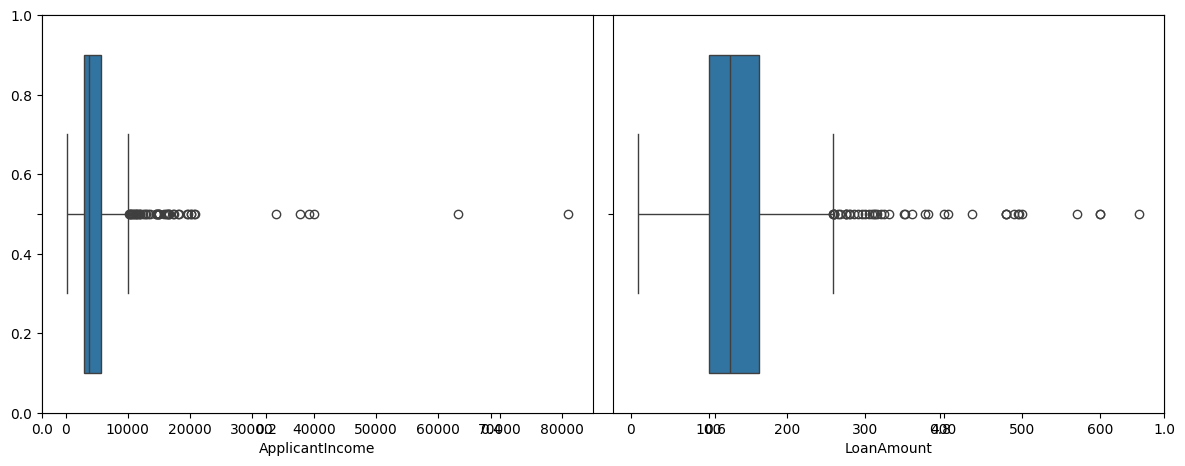

In [ ]:
# Visualize Loan Status Distribution
loan_status = df['Loan_Status'].value_counts()
plt.pie(loan_status.values, labels=loan_status.index, autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

# Visualize Gender and Married vs Loan Status
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.countplot(x=col, hue='Loan_Status', data=df)
plt.tight_layout()
plt.show()

# Visualize income and loan amounts
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

# Boxplot for ApplicantIncome and LoanAmount
plt.subplots(figsize=(12, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(x=df[col])
plt.tight_layout()
plt.show()


### 1. Model Accuracy:
- **Random Forest**:
    - Train Accuracy: 1.0000
    - Validation Accuracy: 0.5097
    - ROC AUC: 0.8982
- **Logistic Regression**:
    - Train Accuracy: 0.5719
    - Validation Accuracy: 0.5234
    - ROC AUC: 0.5769

### 2. Feature Importance:
- **Most influential features**: Credit_History, LoanAmount, ApplicantIncome

### 3. Model Performance:
- **Random Forest** outperforms Logistic Regression with a higher ROC AUC score and accuracy after hyperparameter tuning.
- **Logistic Regression** shows lower performance compared to Random Forest.

### 4. Class Imbalance:
- **RandomOverSampler** balanced the target variable, improving model performance, particularly for Random Forest.

# Loan Analysis Insights  (Charts and Graphs)

## Loan Status Distribution  
- *68.7%* of loans were approved, *31.3%* were rejected.  

## Loan Status vs. Gender  
- More *male applicants* applied and were approved.  
- Female applicants had *fewer approvals and a higher rejection rate*.  

## Loan Status vs. Marital Status  
- *Married applicants* had more applications and approvals.  
- *Unmarried applicants* had a higher rejection rate.  

## Applicant Income Distribution  
- Most applicants earn *below 10,000, but there are **outliers*.  
- Right-skewed distribution with *a few high-income applicants*.  

## Loan Amount Distribution  
- Majority of loans are *below 200, with a few **high-value outliers*.  
- Right-skewed distribution, meaning some applicants take *large loans*.  

## Box Plot Insights  
- *Significant outliers* exist in both *income* and *loan amount*.  
- Most data points are concentrated in a *specific range*.  

## Model Accuracy (Random Forest)  
- *Training accuracy: 1.0000* → Overfitting risk.  
- Needs *test accuracy validation*, feature selection, and regularization.